# Employee Attrition Analysis and Prediction By Rajdeep Mondal


Attrition happens when employees leave their jobs faster than new employees are hired to replace them. This can happen because it takes longer to fill job openings or because the job itself is no longer needed. Sometimes, attrition is beyond the employer's control because they can't find people with the right skills to hire. Attrition is something that happens over a long time, looking at how many people leave over many months or years. To solve attrition, businesses and HR leaders need to think about the big picture and use strategic approaches to address the issue.

# The  Problem 
Acme Corporation, a leading tech company, is facing a significant challenge with employee turnover. The HR department is concerned about the increasing rate of attrition, as it negatively impacts team dynamics, project continuity, and overall company morale. To address this issue, Acme Corporation wants to leverage data analytics and machine learning to understand the factors influencing employee turnover and predict which employees are likely to leave in the near future.

# I will import pandas ,numpy, matplotlib.pyplot, and seaborn Libreries and the datset given by Acme Company

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# import dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# After importing the dataset now lets do the first task data processing and cleaning using the following steps:

1. Data Exploration.
2. Data Cleaning.
3. Data Encoding.
4. Data Labelling.


## 1 . Data Exploration
Lets do some data inspection to know the data structures and contents.

In [43]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [44]:
print(f" There is {df.shape[0]} rows and {df.shape[1]} columns")

 There is 1470 rows and 35 columns


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We can clearly see that The data is well structured and formatted.

Lets see the descriptive statistics of the data.

In [46]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [47]:
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


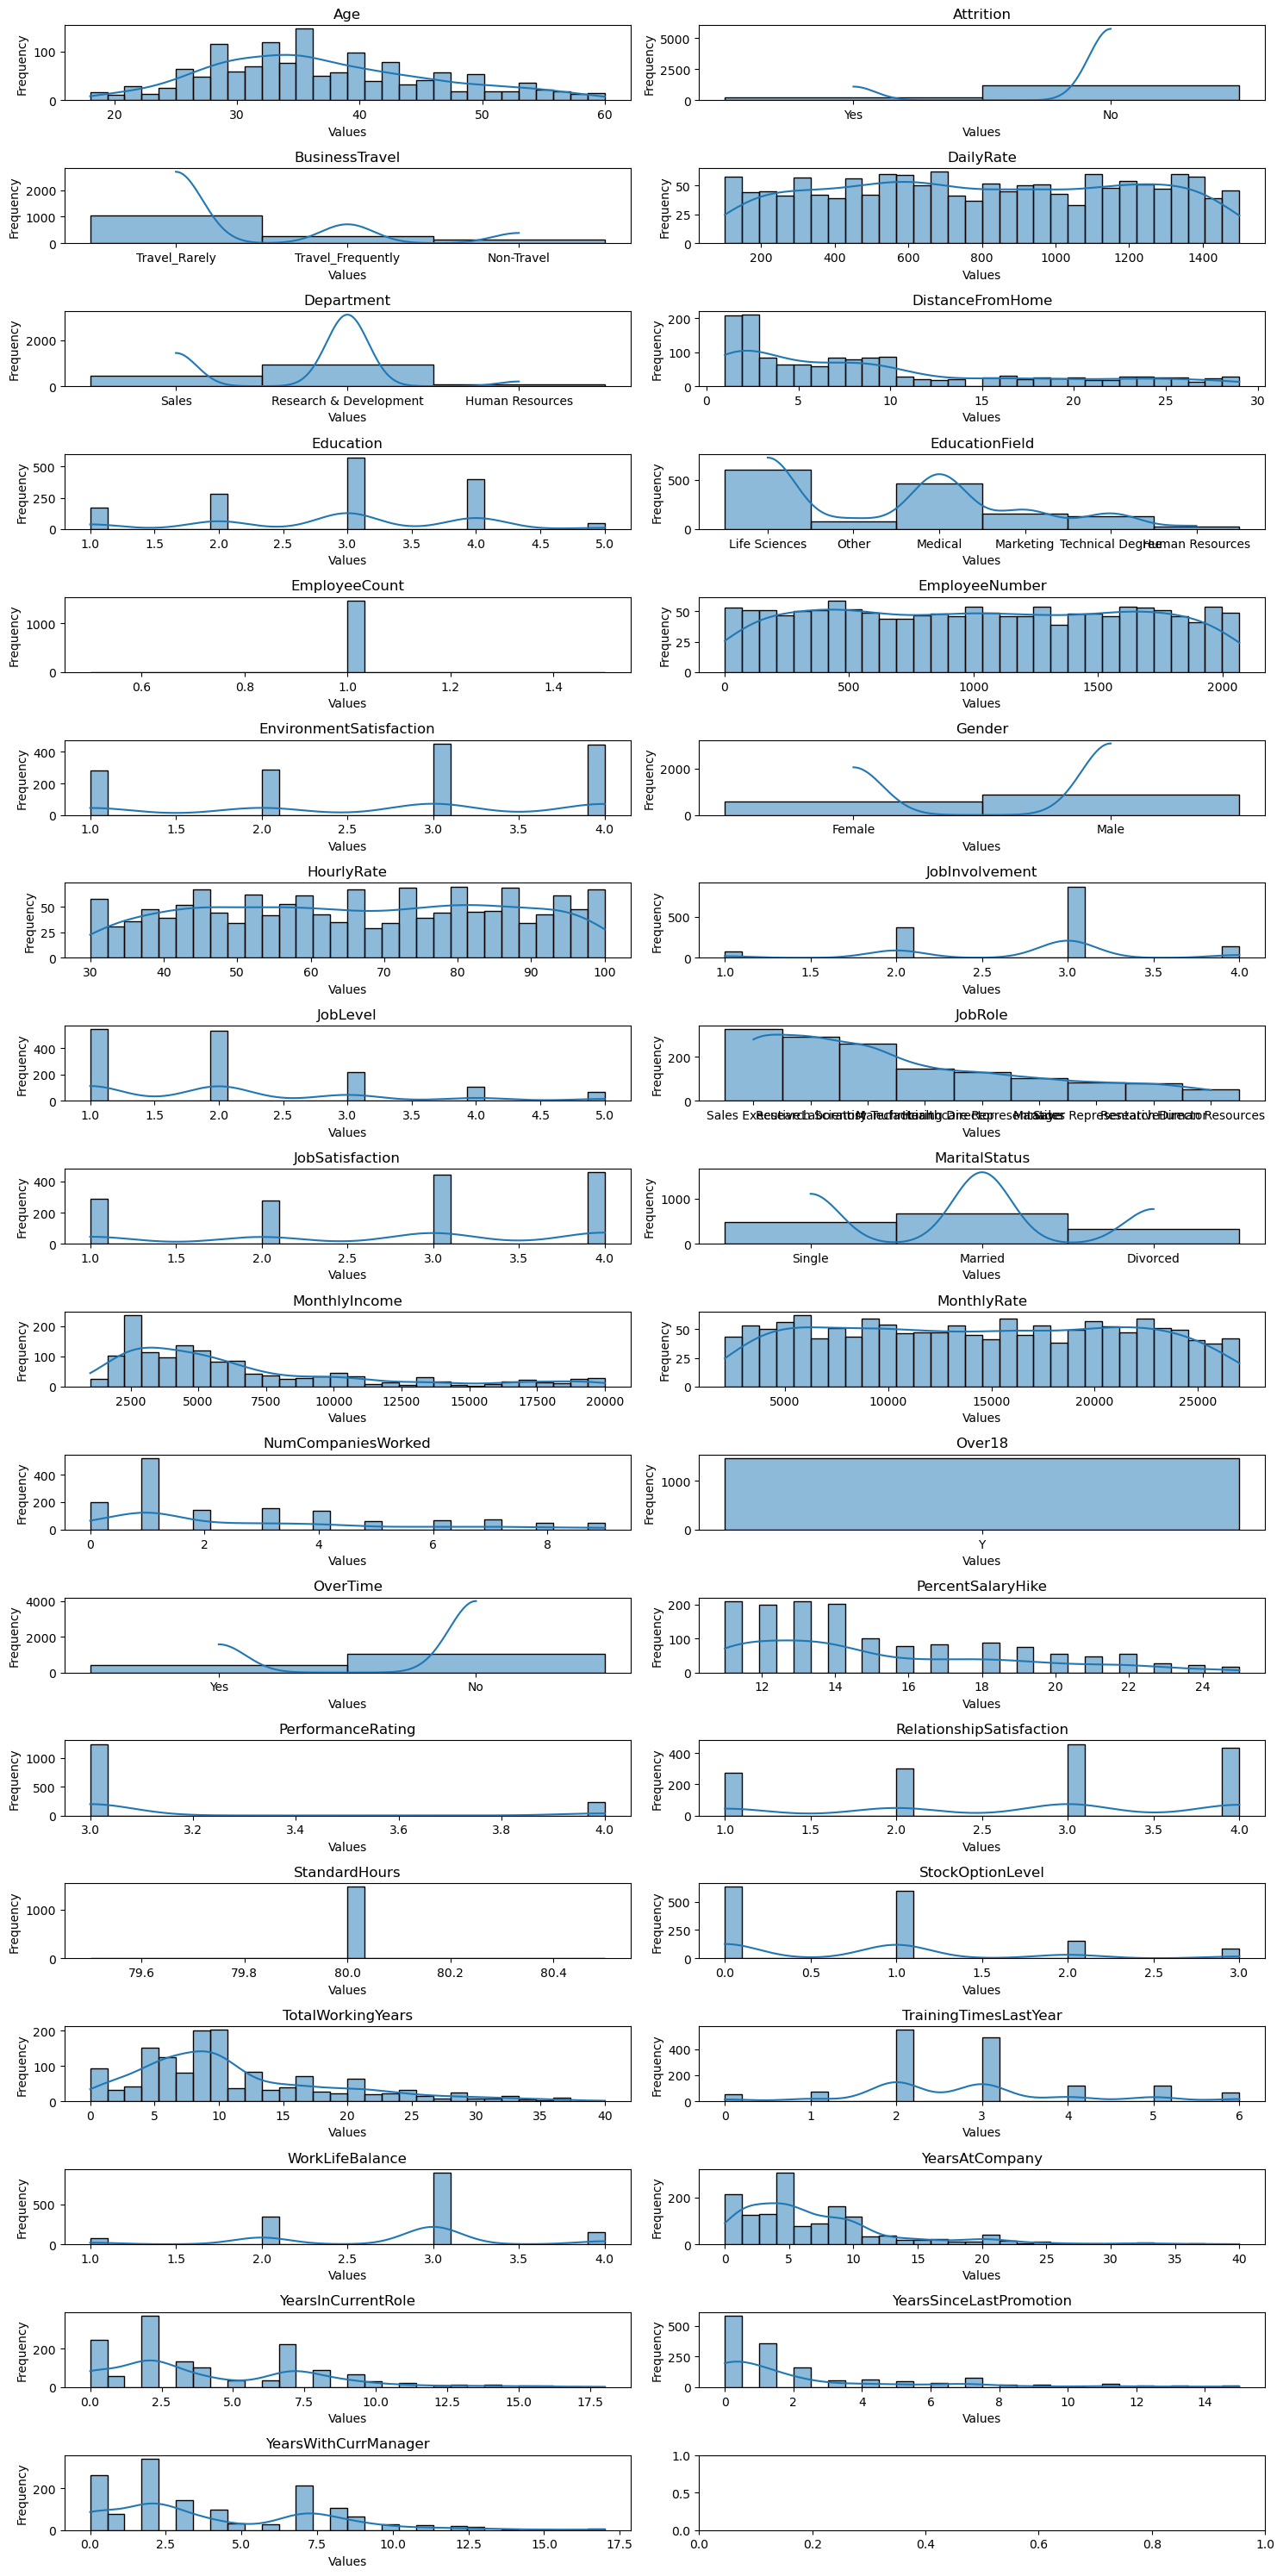

In [48]:
# Let's check the data distribution with the help of visualization.

# Set the number of columns per row in the subplot grid
cols_per_row = 2

# Determine the number of rows needed for the subplot grid
num_cols = df.shape[1]
num_rows = (num_cols + cols_per_row - 1) // cols_per_row

# Create a figure and axis object using subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 30))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Iterate over each column and create a histplot
for i, col in enumerate(df.columns):
    sns.histplot(data=df[col], kde=True, bins=30, alpha=0.5, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# 2 . Data cleaning
Now, let's check if there are any null values in the dataset.

In [49]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# There is no null value. The data is clean

# 3.Data encoding

In [50]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [51]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [52]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [53]:
df['Over18'].unique() 

array(['Y'], dtype=object)

In [54]:
df['Over18'] = df['Over18'].map({'Y':1})

In [55]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [56]:
df['OverTime'] = df['OverTime'].map({'Yes':1, 'No':0})

In [57]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [58]:
df['MaritalStatus'] = df['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})

In [59]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [60]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male':1})

In [61]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [62]:
df['Department'] = df['Department'].map({'Sales': 0, 'Research & Development':1, 'Human Resources':2})

In [63]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [64]:
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely':0, 'Travel_Frequently':1, 'Non-Travel':2})

# 4. Data Labelling

Labeling, on the other hand, refers to the process of assigning labels or categories to data points.


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [66]:
one_hot_encoded = pd.get_dummies(df[['EducationField', 'JobRole']], prefix='category')
one_hot_encoded = one_hot_encoded.astype(int)
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

In [67]:
df_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,category_Technical Degree,category_Healthcare Representative,category_Human Resources,category_Laboratory Technician,category_Manager,category_Manufacturing Director,category_Research Director,category_Research Scientist,category_Sales Executive,category_Sales Representative
0,41,1,0,1102,0,1,2,Life Sciences,1,1,...,0,0,0,0,0,0,0,0,1,0
1,49,0,1,279,1,8,1,Life Sciences,1,2,...,0,0,0,0,0,0,0,1,0,0
2,37,1,0,1373,1,2,2,Other,1,4,...,0,0,0,1,0,0,0,0,0,0
3,33,0,1,1392,1,3,4,Life Sciences,1,5,...,0,0,0,0,0,0,0,1,0,0
4,27,0,0,591,1,2,1,Medical,1,7,...,0,0,0,1,0,0,0,0,0,0


In [68]:
df_encoded.drop(['EducationField', 'JobRole'], axis=1, inplace=True)

In [69]:
df_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,category_Technical Degree,category_Healthcare Representative,category_Human Resources,category_Laboratory Technician,category_Manager,category_Manufacturing Director,category_Research Director,category_Research Scientist,category_Sales Executive,category_Sales Representative
0,41,1,0,1102,0,1,2,1,1,2,...,0,0,0,0,0,0,0,0,1,0
1,49,0,1,279,1,8,1,1,2,3,...,0,0,0,0,0,0,0,1,0,0
2,37,1,0,1373,1,2,2,1,4,4,...,0,0,0,1,0,0,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,0,0,0,0,0,0,0,1,0,0
4,27,0,0,591,1,2,1,1,7,1,...,0,0,0,1,0,0,0,0,0,0
